<a href="https://colab.research.google.com/github/sbooeshaghi/BMGP_2020/blob/main/analysis/notebooks/barcode_validator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sbooeshaghi/BMGP_2020

Cloning into 'BMGP_2020'...
remote: Enumerating objects: 952, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 952 (delta 59), reused 5 (delta 1), pack-reused 817
Receiving objects: 100% (952/952), 474.55 MiB | 17.96 MiB/s, done.
Resolving deltas: 100% (383/383), done.
Checking out files: 100% (155/155), done.


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [3]:
fb_fn = "BMGP_2020/references/scispace/kite/feature_barcodes.txt"

In [4]:
#@title Example barcodes
# MULTISEQ
bcs = [
  "GGAGAAGA",
  "CCACAATG",
  "CCAACCGG",
  "CGAAGCCC",
  "TCAGTCGA",
  "GACCAGCC",
  "CTCAAGGT",
  "CGCCGCAA",
  "ACCAGCCG",
]

bcs_names = [
"BC1",
"BC2",
"BC13",
"BC25",
"BC37",
"BC49",
"BC50",
"BC73",
"BC74",
]


# 10xCRISPR
bcs = [
       "GGCAACGCGACCCCACGAG",
       "ATGTCACCCCCAGACCCCG",
       "TGCAGCGCCGGCGACTCAC",
       "CGGGGCACCGGTGAGTCGC",
       "CACTCGGCGGACGCAAGGG",
       "GCGCACTCGGCGGACGCAA",
       "TGCTGCTTCGGCGACCGGG",
       "TTCTCGCGGGACACCGACG",
       "AGCCCAAGCCAGAGCGGCG",
       "GAGCGGCGCGGCCTGGAAG",
       "ACCCGAGCCGCACCCGCCG",
       "GCACGGGCGGCGGAGACTC",
       "AGCAGGGCTCTCCTCCCGG",
       "TGTGGCTGAAGCAGCGAGG",
       "GGAGAGGCGCAGCATCCAC",
       "GAGGCGCAGCATCCACAGG",
       "GAGCGAGGAGGGCGCTACG",
       "GTCGCTATCGGAGGCCGCG",
       "CACCAGATACAGCGCTCTG",
       "GCGGCAGCGCGGTCAGTGG",
       "GAGCCTCAGCGAGCGGAGG",
       "CTGGAGCCTCAGCGAGCGG",
       "GACGAAGTCTATAAAGGGC",
       "CATGGCGTGAGTACCGGGG",
       "TCCTCCTCAGCAGCACCGG",
       "GTCATGGAGCGGAACGCCA",
       "ACTTTGCTGTACCCATCAG",
       "AGGCCCAGTCATCCTACAC",
       "ATGTTGGCCGCCGCTGCGA",
       "GACGGGAGGATGGAGTCGA",
       "CTTCCACCACAGGTACCTA",
       "CCTCGCCTGGCTGCTCCCT",
       "CCGGCCGGGCGGCGAGTAG",
       "TGCTGATAAGGGAAGGGAC",
       "GCTGCTGCCACAGACCGAG",
       "CCCCGGGAGCGGAGAGCGA",
       "AAACGCACAGCAACTCGCA",
       "GGCGAAATGGCTCCGACCG",
       "CACAGGAGACCATGTCCGG",
       "AGGGCAGCGAGAGGTTCGC",
       "GAGCTTTCGCAGCTGGAGA",
       "TCACTATCTCCCGGGTGAA",
       "GGCCCGCGCGGCACTTACG",
       "GCGCGGGCGGGAAGCGAAG",
       "GCGCGGGCAGCGTGAAGCG",
       "GCGCGTGCGTACGCGACGG",
       "CGGACCTCGGGATCTGGGT",
       "CCGGGCGCTGTCGGACCTC",
       "CCTTGCACCGGGCTTTGCA",
       "CGCCGGCCGCGGTTCTCCC",
       "CCGGCCCAGGATGTAGAGC",
       "CTGCGGGCGCTGGCAAATC",
       "TGGTGTCATGGCAGCTGCG",
       "ACGCTTCGGGTTGGTGTCA",
       "GAGATCCGCGGAGGCCGAC",
       "CGACGGCAGAGGGGCCTAA",
       "CCGCCATGGCCGACAAGGA",
       "GTGCAGTCCCCGGTACTGA",
       "CCCAAGCGCCTACTCGCAC",
       "CTGCGAAAGCGCCAGGGTG",
       "GATCGCCGAGCGCGAGTGA",
       "GGGAGAGCGAGCAGCGAGC",
       "CTCAGGGCAGCGAGACTAT",
       "GCCGGCCGGCCGGCACGGG",
       "TTTTGGGCCGCGGCGGGAG",
       "GTCTCACCATGGAGCGGAA",
       "AGACGGAGCTCTTGAGTAG",
       "TGAGTAGAGGGCCGAAGAG",
       "CCGGCGGGTAGCTGGCGGG",
       "AGGCTCCGGCGGACCGAGG",
       "ACTTCGGTCGCGGGCGGTG",
       "GAAACGCTGCCGCTGAGGG",
       "GTTAGAGCCCGTGCGGAGG",
       "CTGCGGCGGAGCCTCCTTA",
       "TGCGTGAGGCGAGAGGAGC",
       "ACGCACGAGTGGAAGTCCC",
       "CGACACCGCGGCTTCCGCG",
       "GCCCGTCGGCGGGTGTCGA",
       "GCCCCGCTCGGCGATACCC",
       "GTCGCGTCCGACACCCGGT",
       "TACAGCAACAAGGCTGAGA",
       "GTCTTGGCCTGTTCCTCAA",
       "CGAGCCGGGACCCTGGTAC",
       "CTGGAGCGCGGCAGGTGAG",
       "GCCGGCGAACCAGGAAATA",
       "AGCGATAGCTGAGTGGCGG",
       "GCGCAGGCAGAAGTCACCG",
       "ACTCCACCGCCCGGAGCAG",
       "ACCGACTGACGGTAGGGAC",
       "GGACGGGAGGCGAGCAAGA",
]

bcs_names = [
"APH1A-1",
"APH1A-2",
"CDKN3-1",
"CDKN3-2",
"EZR-1",
"EZR-2",
"GRB2-1",
"GRB2-2",
"GSK3A-1",
"GSK3A-2",
"HRAS-1",
"HRAS-2",
"JUN-1",
"JUN-2",
"PPIB-1",
"PPIB-2",
"SNRNP70-1",
"SNRNP70-2",
"SNRNP40-1",
"SNRNP40-2",
"PPP2CA-1",
"PPP2CA-2",
"ATF4-1",
"ATF4-2",
"BAZ1B-1",
"BAZ1B-2",
"BRD4-1",
"BRD4-2",
"CAMLG-1",
"CAMLG-2",
"CSNK2A1-1",
"CSNK2A1-2",
"CTCF-1",
"CTCF-2",
"CTNNB1-1",
"CTNNB1-2",
"DHX9-1",
"DHX9-2",
"EIF4EBP1-1",
"EIF4EBP1-2",
"ELOF1-1",
"ELOF1-2",
"H2AFY-1",
"H2AFY-2",
"KDM1A-1",
"KDM1A-2",
"LMNA-1",
"LMNA-2",
"MBNL1-1",
"MBNL1-2",
"MORF4L1-1",
"MORF4L1-2",
"NOC2L-1",
"NOC2L-2",
"PAIP2-1",
"PAIP2-2",
"RBBP4-1",
"RBBP4-2",
"RBM25-1",
"RBM25-2",
"SET-1",
"SET-2",
"SMARCD1-1",
"SMARCD1-2",
"SRPK1-1",
"SRPK1-2",
"SRRT-1",
"SRRT-2",
"SUZ12-1",
"SUZ12-2",
"TPR-1",
"TPR-2",
"TRA2B-1",
"TRA2B-2",
"UBE2N-1",
"UBE2N-2",
"UBXN1-1",
"UBXN1-2",
"EZH2-1",
"EZH2-2",
"ACE2-1",
"ACE2-2",
"TMPRSS2-1",
"TMPRSS2-2",
"RAB1A-2",
"RAB1A-3",
"DPP4-1",
"DPP4-2",
"HDAC1-1",
"HDAC1-2",
]

In [113]:
def load_bcs(bcs_fn):
  bcs = []
  bcs_names = []
  with open(fb_fn, 'r') as f:
    for l in f.readlines():
      l = l.strip()
      bc, n = l.split("\t")
      bcs.append(bc)
      bcs_names.append(n)
  return (bcs, bcs_names)

def kmerize(s, k):
  L = len(s)
  return [s[i:i+k] for i in range(L-k+1)]
kmerize("sina" ,3)

complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'} 
def rev_c(seq):
    bases = list(seq) 
    bases = reversed([complement.get(base,base) for base in bases])
    bases = ''.join(bases)
    return bases
rev_c("ATC")

def make_ec(bcs, bcs_names, k=None, rc=False):
  length = min([len(i) for i in bcs])
  if not k:
    k = length
  d = defaultdict(list)
  for bc, bc_name in zip(bcs, bcs_names):
    # forward strand
    if rc:
      bc = rev_c(bc)
      bc_name = f"{bc_name}_rc"
    kmers = kmerize(bc, k)
    for kmer in kmers:
      d[''.join(kmer)].append(bc_name)
  return d

# def check_kmers(bcs, bcs_names, k=None):
#   length = min([len(i) for i in bcs])
#   if not k:
#     k = length if length % 2 else length - 1
#     print(f"Optimal kmer length: {k}")

#   d = defaultdict(list)
#   for bc, bc_name in zip(bcs, bcs_names):
#     # forward strand
#     kmers = kmerize(bc, k)
#     for kmer in kmers:
#       d["".join(kmer)].append(bc_name)
    
#     # reverse complement strand
#     kmers = kmerize(rev_c(bc), k)
#     for kmer in kmers:
#       d["".join(kmer)].append(bc_name + "_rc")
#   return d

def ham(k1, k2):
    first  = np.array(list(k1))
    second = np.array(list(k2))
    dist = (first!=second).sum()
    return dist

def cmp_kmers(ecs, rc = False):
  kmers = list(ecs.keys())
  ecs = list(ecs.values())
  d = defaultdict()
  n = len(kmers)
  nc = n*(n-1)//2
  checkpoint = nc//10
  print(f"Making {nc:,.0f} comparisons")
  c = 0
  for i in range(n):
    for j in range(i+1, n):
      c += 1
      if c % checkpoint == 0:
        print(f"{c:,.0f}")
      k1, k2 = kmers[i], kmers[j]
      
      # if comparing kmer to revc of other kmers
      if rc:
        k2 = rev_c(k2)
      
      dist = ham(k1, k2)
      d[(kmers[i], kmers[j])] = dist
  return d

def ambig_ecs(ecs):
  ambig = []
  for i in ecs.values():
    if len(i) > 1:
      ambig.append(i)
  return ambig

def merge_ecs(ecs1, ecs2):
  m = defaultdict(set)

  uniq = set(list(ecs1.keys()) + list(ecs2.keys()))
  print(f"{len(uniq):,.0f} unique kmers")
  for k in uniq:
    m[k].update(ecs2[k])
    m[k].update(ecs1[k])
  return m

In [8]:
bcs, bcs_names = load_bcs(fb_fn)

# Validation

## Length validation

In [9]:
bc_len = min([len(i) for i in bcs])
max_bcs = 4**bc_len
max_bcs

1048576

## Barcodes with subsequences that are ambiguous

In [114]:
ecs = make_ec(bcs, bcs_names)
ecs_rc = make_ec(bcs, bcs_names, rc=True)

In [115]:
ambig = ambig_ecs(ecs)

In [116]:
ambig

[['slide_2G', 'slide_2H']]

## Shared subsequence

In [99]:
# m = merge_ecs(ecs, ecs_rc)
# c = cmp_kmers(m)
c = cmp_kmers(ecs)

3,112 unique kmers
Making 4,840,716 comparisons
100,000
200,000
300,000
400,000
500,000
600,000
700,000
800,000
900,000
1,000,000
1,100,000
1,200,000
1,300,000
1,400,000
1,500,000
1,600,000
1,700,000
1,800,000
1,900,000
2,000,000
2,100,000
2,200,000
2,300,000
2,400,000
2,500,000
2,600,000
2,700,000
2,800,000
2,900,000
3,000,000
3,100,000
3,200,000
3,300,000
3,400,000
3,500,000
3,600,000
3,700,000
3,800,000
3,900,000
4,000,000
4,100,000
4,200,000
4,300,000
4,400,000
4,500,000
4,600,000
4,700,000
4,800,000
Making 4,840,716 comparisons
100,000
200,000
300,000
400,000
500,000
600,000
700,000
800,000
900,000
1,000,000
1,100,000
1,200,000
1,300,000
1,400,000
1,500,000
1,600,000
1,700,000
1,800,000
1,900,000
2,000,000
2,100,000
2,200,000
2,300,000
2,400,000
2,500,000
2,600,000
2,700,000
2,800,000
2,900,000
3,000,000
3,100,000
3,200,000
3,300,000
3,400,000
3,500,000
3,600,000
3,700,000
3,800,000
3,900,000
4,000,000
4,100,000
4,200,000
4,300,000
4,400,000
4,500,000
4,600,000
4,700,000
4,800,000

In [70]:
ambig

[['slide_2G', 'slide_2H']]

In [102]:
df = pd.Series(c)

In [107]:
df.nsmallest(10)

GGTACCGGCA  GGTACCGGCT    1
ACGATAATAA  ACCATAATAA    1
TATGGAGGCC  AATGGAGGCC    1
TTATGATAGA  TTATGATAGG    1
AGCCGGTACC  TGCCGGTACC    1
TTATTATGGT  TTATTATCGT    1
TGGCCATGCA  TGGCCATGCC    1
TGACGCTCCG  TGACGCTCTG    1
TTGATATATT  TTGATATCTT    1
TTGGACGCTG  TTGGACGCGG    1
dtype: int64

In [109]:
ecs["GGTACCGGCT"]

[]

In [104]:

[(i, ecs[i],j, ecs[j], df[i,j]) for i,j in df.nsmallest(10).index]

[('GGTACCGGCA', ['slide_1F'], 'GGTACCGGCT', [], 1),
 ('ACGATAATAA', ['sector6'], 'ACCATAATAA', [], 1),
 ('TATGGAGGCC', ['sector8'], 'AATGGAGGCC', [], 1),
 ('TTATGATAGA', ['sector9'], 'TTATGATAGG', [], 1),
 ('AGCCGGTACC', ['RT_195'], 'TGCCGGTACC', [], 1),
 ('TTATTATGGT', ['RT_209'], 'TTATTATCGT', [], 1),
 ('TGGCCATGCA', ['RT_227'], 'TGGCCATGCC', [], 1),
 ('TGACGCTCCG', ['RT_228'], 'TGACGCTCTG', [], 1),
 ('TTGATATATT', ['RT_232'], 'TTGATATCTT', [], 1),
 ('TTGGACGCTG', ['RT_237'], 'TTGGACGCGG', [], 1)]

### Varying length of subesequnce

In [85]:
# across multiple kmer lengths
kmer_lens = np.arange(2, bc_len + 1)
ambig_bcs = []
for kmer_len in kmer_lens:
  # Determine the set of ambiguous barcodes
  ambig_bc = set()
  ecs = make_ec(bcs, bcs_names, kmer_len)
  for k,i in ecs.items():
    if len(i) > 1:
      ambig_bc.update(i)
      # for j in i:
      #   ambig_bc.add(j.split("_")[0])
  ambig_bcs.append(list(ambig_bc))


In [86]:
[len(i) for i in ambig_bcs]

[1558, 1558, 1558, 1558, 1558, 1312, 2, 2, 2]

In [88]:
i = 0
for k, v in make_ec(bcs, bcs_names, k=10).items():
  if len(v) > 1:
    i += 1
    print(i, k, v)

1 AGCTTATCCG ['slide_2G', 'slide_2H']


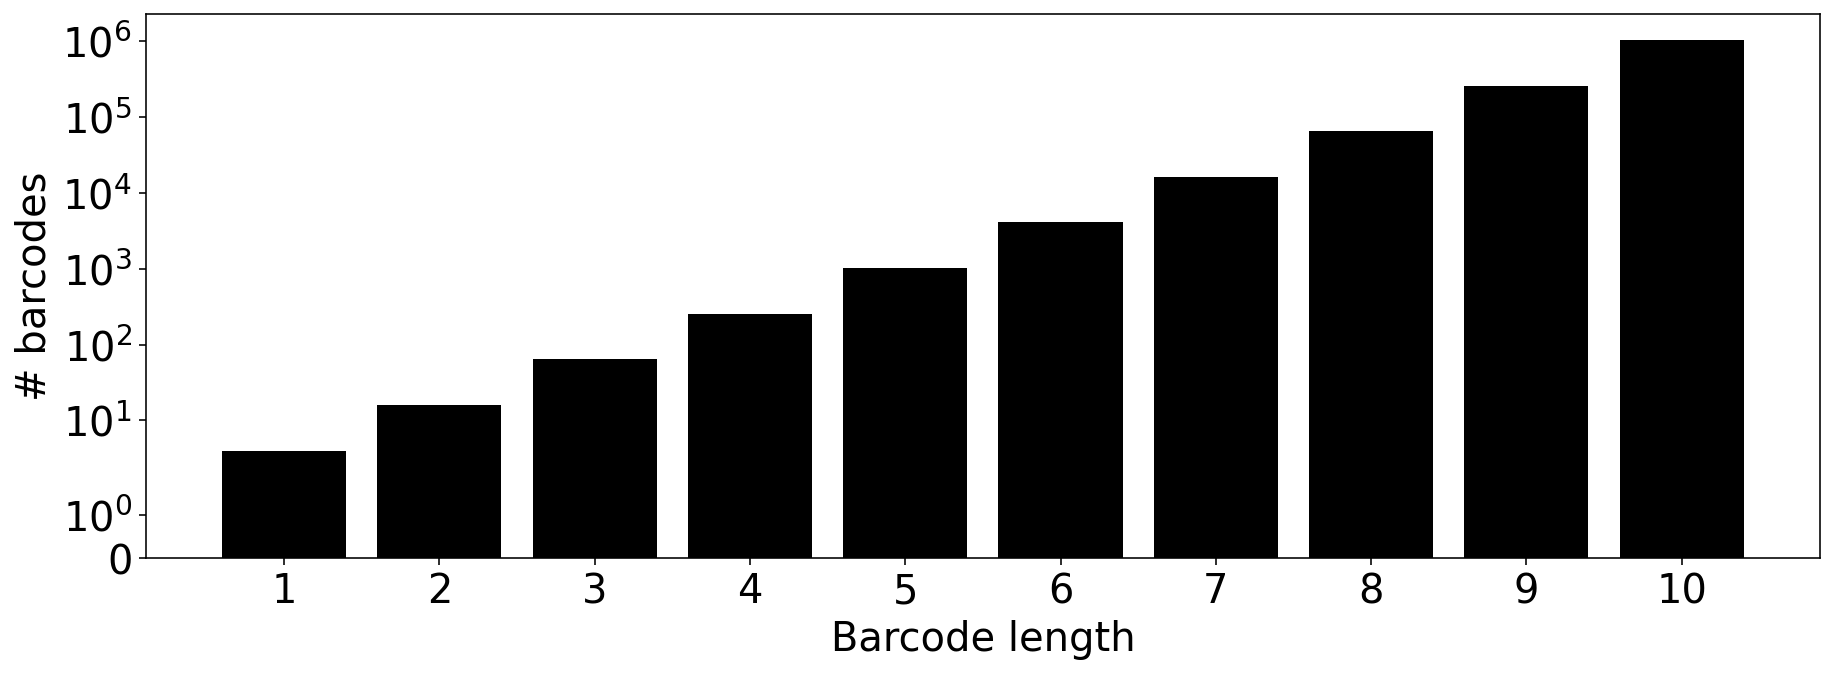

In [89]:
fig, ax = plt.subplots(figsize=(15,5))

x = np.arange (1, bc_len + 1)
y = 4**x

ax.bar(x, y, color="k")
ax.set(**{
    "yscale": "symlog",
    "xticks": x,
    "xlabel": "Barcode length",
    "ylabel": "# barcodes"
})
fig.savefig("barcode_diversity.png", dpi=300, bbox_inches="tight")
fig.show()


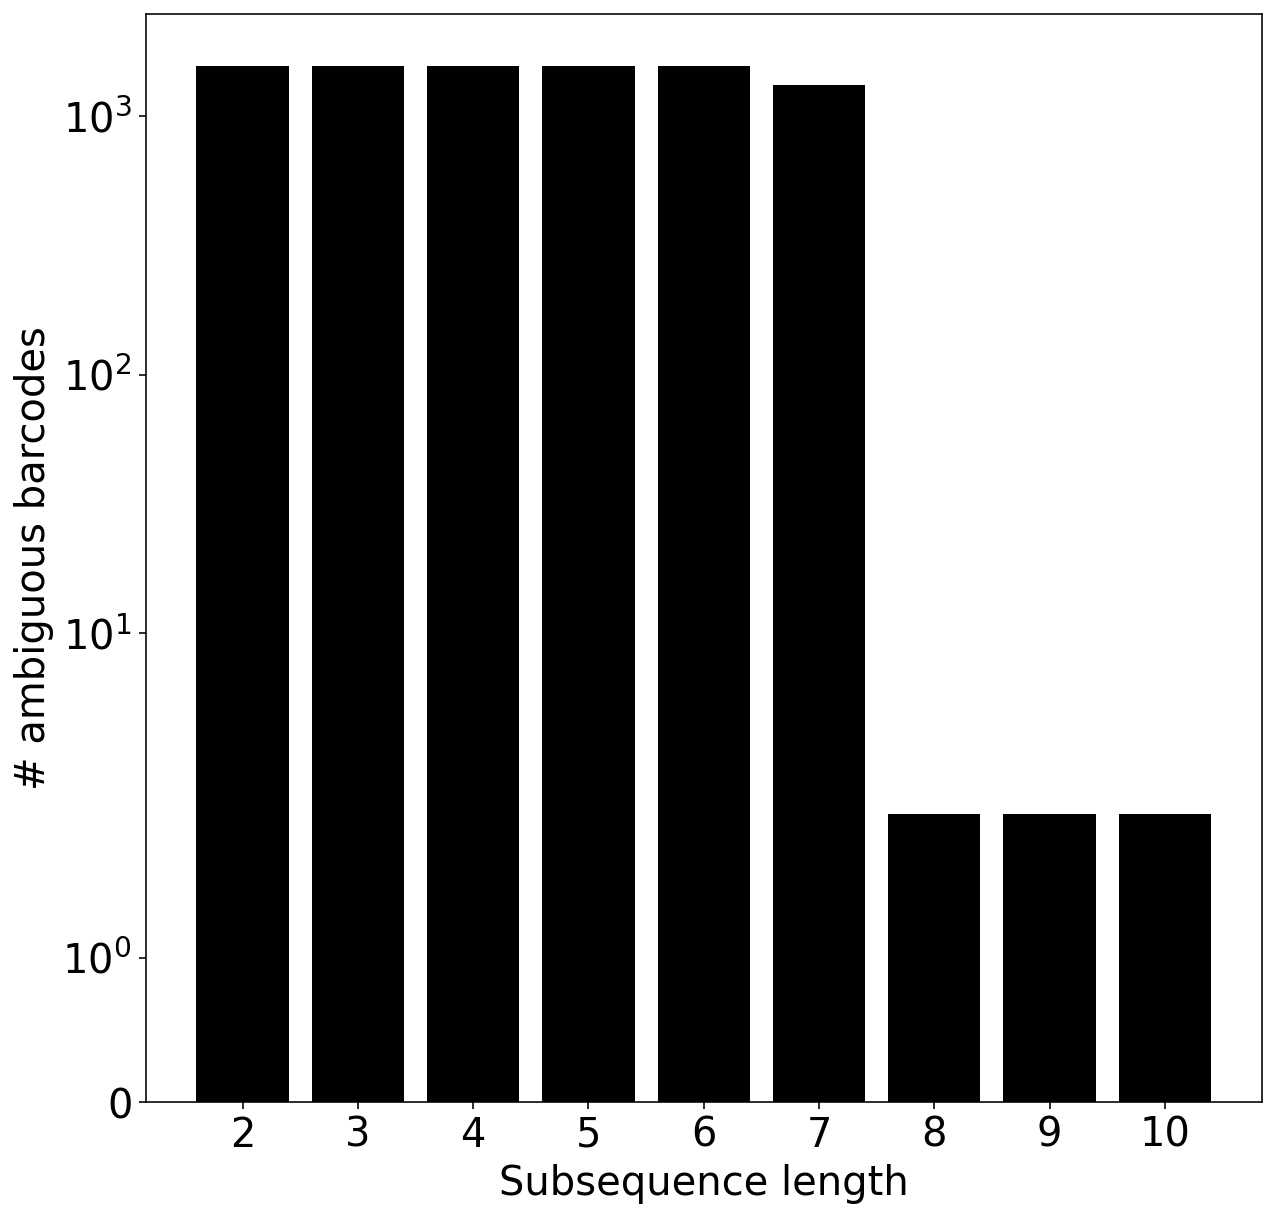

In [92]:
fig, ax = plt.subplots(figsize=(10,10))

x = kmer_lens
y = [len(i) for i in ambig_bcs]

ax.bar(x, y, color="k")
ax.set(**{
    "xticks": x,
    "xlabel": "Subsequence length",
    "ylabel": "# ambiguous barcodes",
    "yscale": "symlog"
})
fig.savefig("shared_subseq.png", dpi=300, bbox_inches="tight")

fig.show()

## Pairwise hamming / edit distance

In [95]:
df

CCGGCGGCGA  TTCCTTCTAG    10
            GCGCATGGAA     6
            CGAATGAGCT     8
            CTTCTCGACT     8
            GCCGAACTGC     7
                          ..
AACGGAACGC  GTCGTTCTGA     7
            GAAGGTTGCC     6
TTAAGCGCTA  GTCGTTCTGA     8
            GAAGGTTGCC     8
GTCGTTCTGA  GAAGGTTGCC     7
Length: 4840716, dtype: int64

In [97]:
df.unstack().values[:, :,]

array([[nan,  3.,  3., ..., nan,  9., nan],
       [nan, nan, nan, ..., nan, 10., nan],
       [nan,  4., nan, ..., nan,  9., nan],
       ...,
       [ 7.,  9.,  8., ..., nan,  3.,  3.],
       [nan, nan, nan, ..., nan, nan, nan],
       [10., 10.,  9., ..., nan,  3., nan]])

In [ ]:
n_bcs = len(bcs)
mat = np.zeros(( n_bcs, n_bcs ))
for i in range(len(bcs)):
  for j in range(i, len(bcs)):
    first  = np.array(list(bcs[i]))
    second = np.array(list(bcs[j]))
    mat[i,j] = (first!=second).sum()

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))

im = ax.imshow(mat.T, cmap="Reds_r")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, label="Distance", cax=cax)

# for (j,i),label in np.ndenumerate(mat.T):
#   ham = mat[i,j]
#   if i <= j:
#     string = f"{ham:,.0f}"
#     ax.text(i,j,string,ha='center',va='center')

ax.set(**{
    "xticklabels": bcs_names,
    "yticklabels": bcs_names,
    "xticks": np.arange(len(bcs_names)),
    "yticks": np.arange(len(bcs_names)),
    "title": "Hamming distance"
})

ax.set_xticklabels(bcs_names, rotation = 90)

# fig.savefig("pairwise.png", dpi=300, bbox_inches="tight")

fig.show()

Error in callback <function flush_figures at 0x7f36d405ce60> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
mat

array([[0., 6., 8., ..., 9., 7., 7.],
       [0., 0., 8., ..., 9., 8., 9.],
       [0., 0., 0., ..., 9., 9., 7.],
       ...,
       [0., 0., 0., ..., 0., 7., 6.],
       [0., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
np.min(mat[mat>0])

3.0